# DIPA Practical 8
- Name : Aayush Shah
> Roll Number : 19BCE245

- noise removal through fourir transform
- edge detection through mask
- discontinuity detection





In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import skimage.io as sk
from PIL import Image 
from collections import Counter
import math

---

# PART 1 : NOISE REMOVAL

In [ ]:
# img = io.imread('/content/abcl.jpg', as_gray = True)
# cv2_imshow(img)

In [ ]:
img = io.imread('spiderman-forever.jpeg', as_gray = True)
# cv2_imshow(img)

In [ ]:
img = img.astype('float64')
for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    if((i+j)%2 == 0):
      img[i][j] = img[i][j] * (-1)

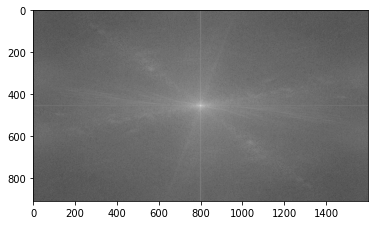

In [ ]:
fi = np.fft.fft2(img)
plt.imshow(np.log(abs(fi)), cmap="gray")

In [ ]:
# mask = np.zeros(fi.shape)
mask = np.ones(fi.shape)
d0 = 50
d1 = 80
a = float(img.shape[0]/2)
b = float(img.shape[1]/2)
for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    d = float(math.sqrt(((i-a)**2) + ((j-b)**2)))
    if(d<d1 and d>d0):
      mask[i][j] = 0

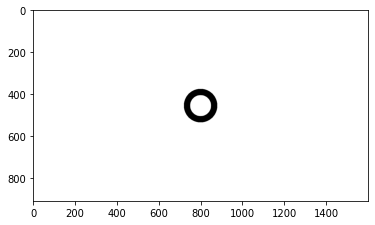

In [ ]:
plt.imshow(mask, cmap="gray")

In [ ]:
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
ffi = np.zeros(fi.shape)
ffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    if(mask[i][j]==1):
      ffi[i][j] = fi[i][j]
    else:
      ffi[i][j] = complex(0,0)

In [ ]:
inverse_ffi = np.fft.ifft2(ffi)

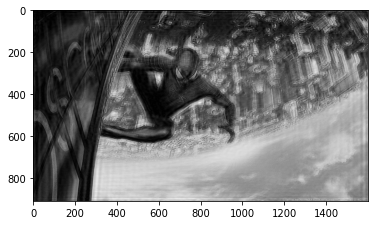

In [ ]:
plt.imshow(abs(inverse_ffi), cmap="gray")

---

# Part 2 : EDGE DETECTION

## Prewitt’s Operator for vertical and horizontal edge detection
- G<sub>x</sub> = 

|1|1|1|
|---|---|---|
|0|0|0|
|-1|-1|-1|

- G<sub>y</sub> = 

|1|0|-1|
|---|---|---|
|1|0|-1|
|1|0|-1|

## Robinson Compass Mask for diagonal edge detection
- G<sub>north-west</sub> = 

|0|1|2|
|---|---|---|
|-1|0|1|
|-2|-1|0|

- G<sub>north-east</sub> = 

|-2|-1|0|
|---|---|---|
|-1|0|1|
|0|1|2|


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('spiderman-forever.jpeg').convert('L')).astype(np.uint8)
gray_img = img
# # Apply gray scale
# gray_img = np.round(0.299 * img[:, :, 0] +
#                     0.587 * img[:, :, 1] +
#                     0.114 * img[:, :, 2]).astype(np.uint8)

# img = io.imread('spiderman-forever.jpeg', as_gray = True)


# Define filters for Prewitt Operator
vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
horizontal = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1
# Define filters for Robinson Compass Operator
north_west = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])  # s2
north_east = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])  # s1

h, w = gray_img.shape

# define images with 0s
newgradientImage = np.zeros((h, w))
newHorizontalEdgesImage = np.zeros((h, w))
newVerticalEdgesImage = np.zeros((h, w))
newNorthWestEdgesImage = np.zeros((h, w))
newNorthEastEdgesImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j])     + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1])     + \
                         (horizontal[1, 1] * gray_img[i, j])         + \
                         (horizontal[1, 2] * gray_img[i, j + 1])     + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j])     + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1])     + \
                       (vertical[0, 1] * gray_img[i - 1, j])         + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1])     + \
                       (vertical[1, 0] * gray_img[i, j - 1])         + \
                       (vertical[1, 1] * gray_img[i, j])             + \
                       (vertical[1, 2] * gray_img[i, j + 1])         + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1])     + \
                       (vertical[2, 1] * gray_img[i + 1, j])         + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        northWestGrad = (north_west[0, 0] * gray_img[i - 1, j - 1]) + \
                    (north_west[0, 1] * gray_img[i - 1, j])     + \
                    (north_west[0, 2] * gray_img[i - 1, j + 1]) + \
                    (north_west[1, 0] * gray_img[i, j - 1])     + \
                    (north_west[1, 1] * gray_img[i, j])         + \
                    (north_west[1, 2] * gray_img[i, j + 1])     + \
                    (north_west[2, 0] * gray_img[i + 1, j - 1]) + \
                    (north_west[2, 1] * gray_img[i + 1, j])     + \
                    (north_west[2, 2] * gray_img[i + 1, j + 1])

        northEastGrad = (north_east[0, 0] * gray_img[i - 1, j - 1]) + \
                    (north_east[0, 1] * gray_img[i - 1, j])     + \
                    (north_east[0, 2] * gray_img[i - 1, j + 1]) + \
                    (north_east[1, 0] * gray_img[i, j - 1])     + \
                    (north_east[1, 1] * gray_img[i, j])         + \
                    (north_east[1, 2] * gray_img[i, j + 1])     + \
                    (north_east[2, 0] * gray_img[i + 1, j - 1]) + \
                    (north_east[2, 1] * gray_img[i + 1, j])     + \
                    (north_east[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag
        newHorizontalEdgesImage[i - 1, j - 1] = horizontalGrad
        newVerticalEdgesImage[i - 1, j - 1]  = verticalGrad
        newNorthWestEdgesImage[i - 1, j - 1]  = northWestGrad
        newNorthEastEdgesImage[i - 1, j - 1]  = northEastGrad


# plt.figure()
# plt.title('spiderman-forever-prewitt.png')
# plt.imsave('spiderman-forever-prewitt.png', newgradientImage, cmap='gray', format='png')
# plt.imshow(newgradientImage, cmap='gray')



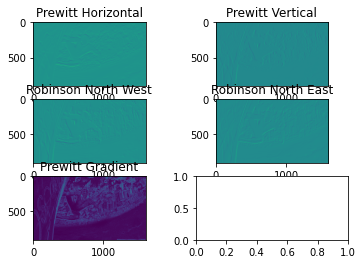

In [ ]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].imshow(newHorizontalEdgesImage)
axs[0, 0].set_title('Prewitt Horizontal')
axs[0, 1].imshow(newVerticalEdgesImage)
axs[0, 1].set_title('Prewitt Vertical')
axs[1, 0].imshow(newNorthWestEdgesImage)
axs[1, 0].set_title('Robinson North West')
axs[1, 1].imshow(newNorthEastEdgesImage)
axs[1, 1].set_title('Robinson North East')
axs[2, 0].imshow(newgradientImage)
axs[2, 0].set_title('Prewitt Gradient')

plt.show()

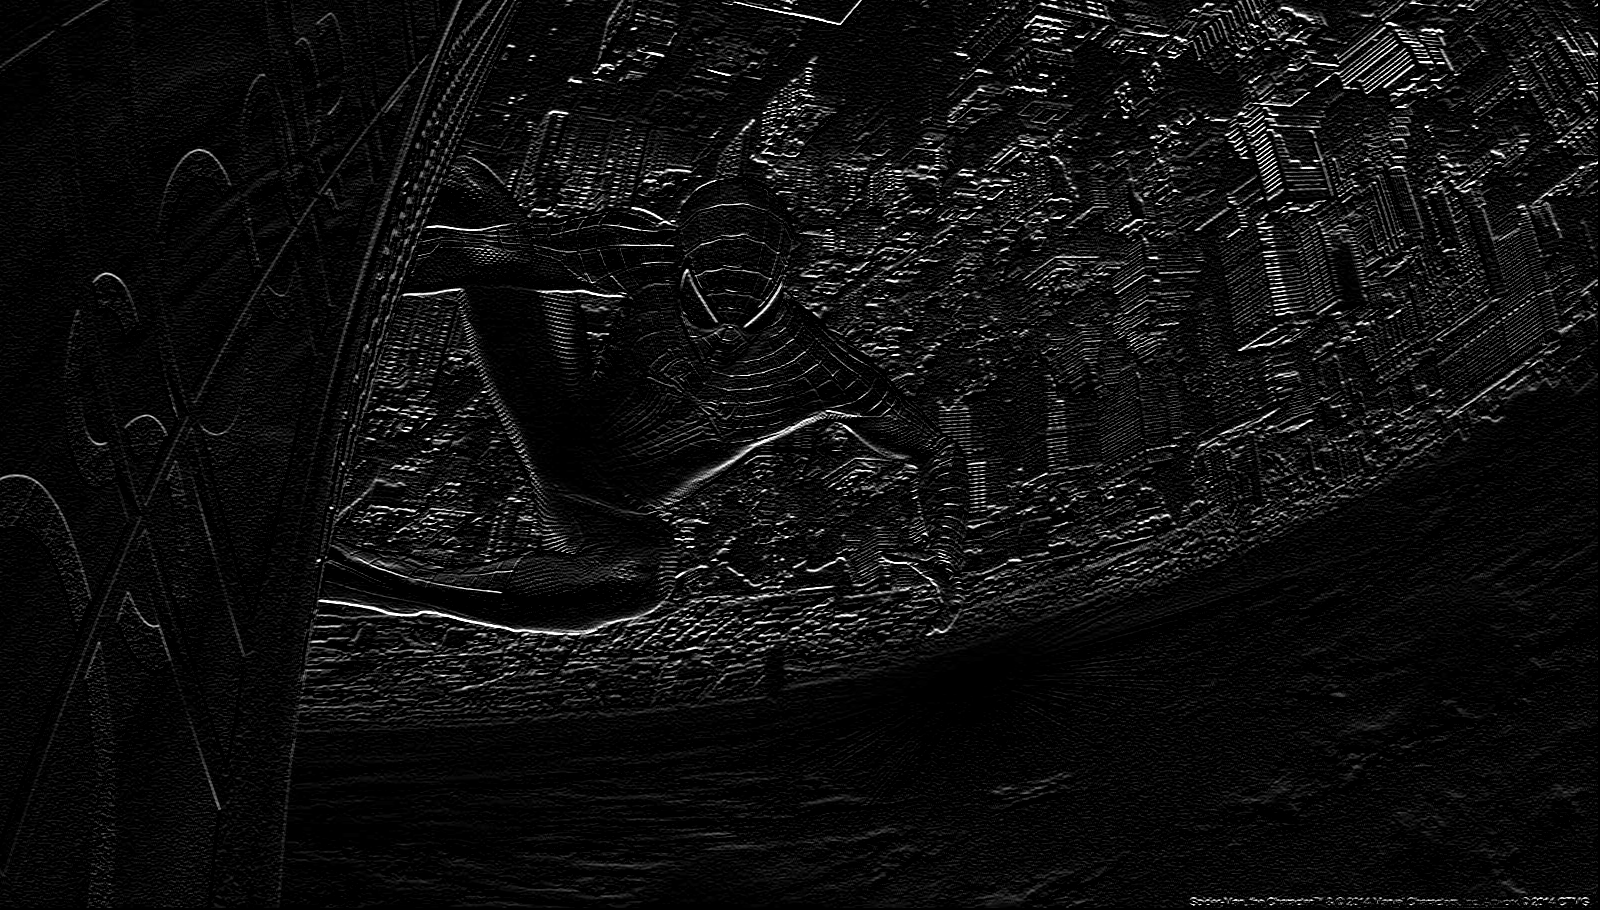

In [ ]:
cv2_imshow(newHorizontalEdgesImage)

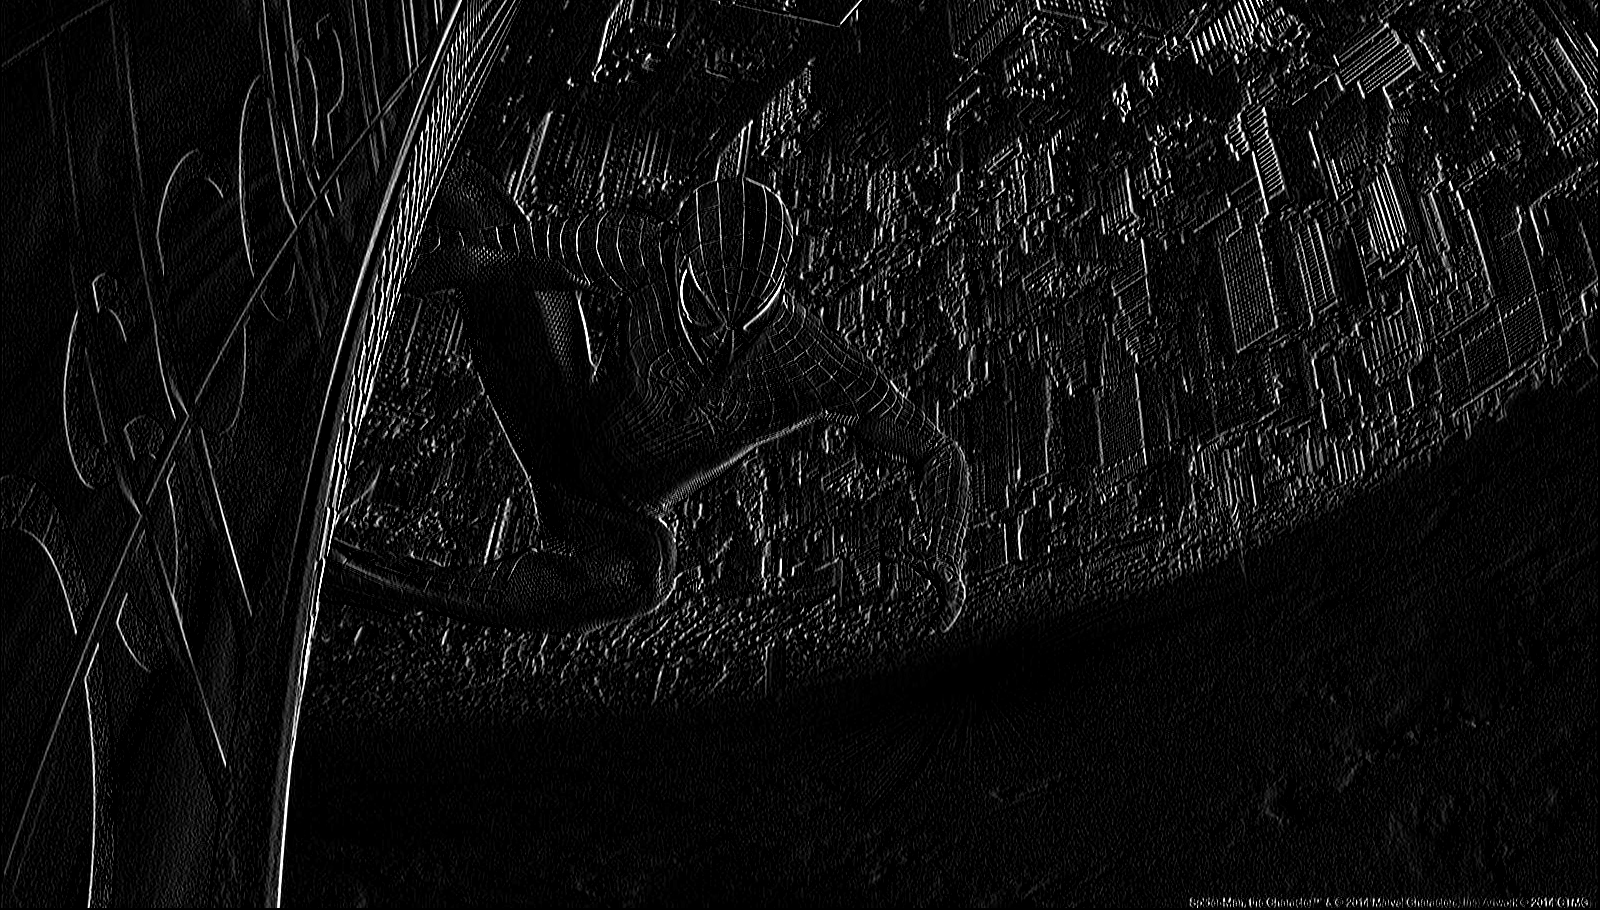

In [ ]:
cv2_imshow(newVerticalEdgesImage)

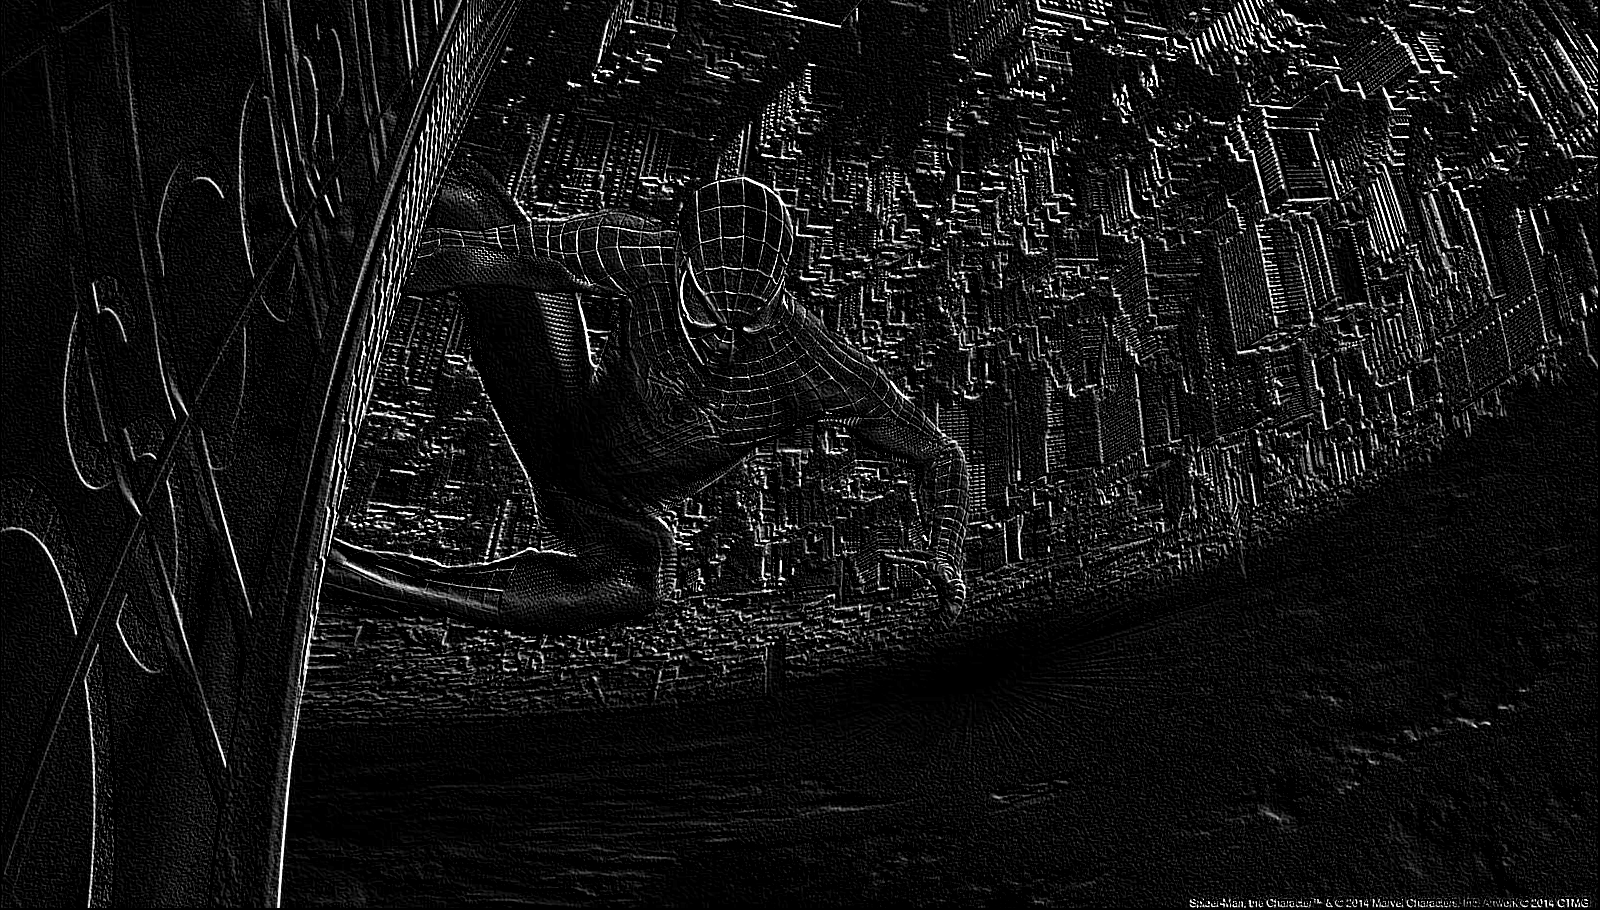

In [ ]:
cv2_imshow(newNorthWestEdgesImage)

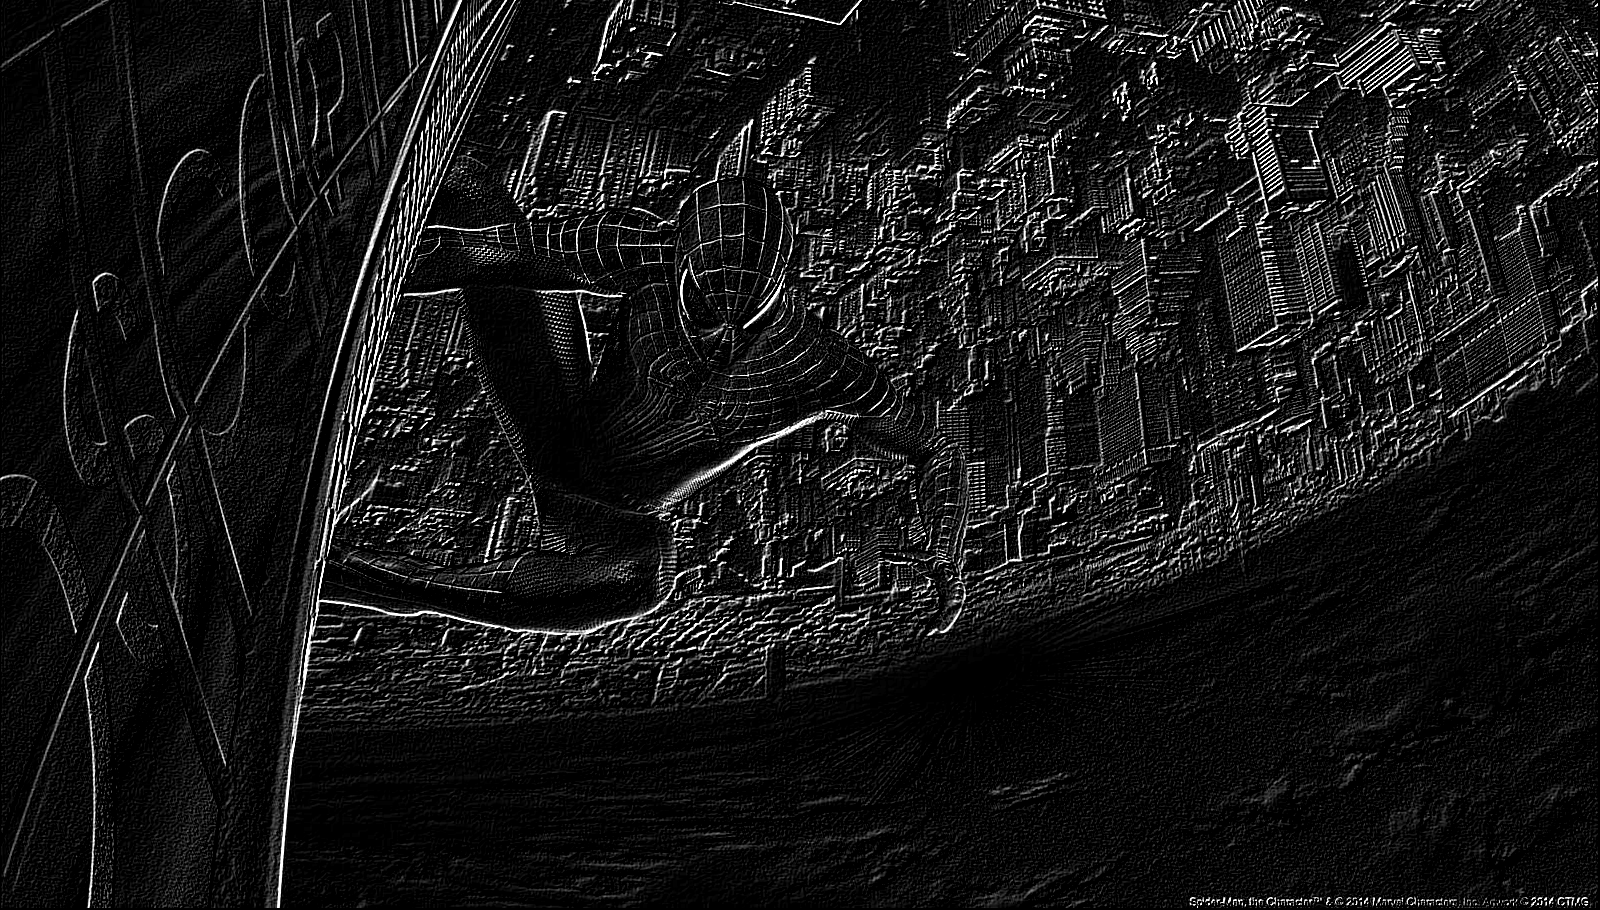

In [ ]:
cv2_imshow(newNorthEastEdgesImage)

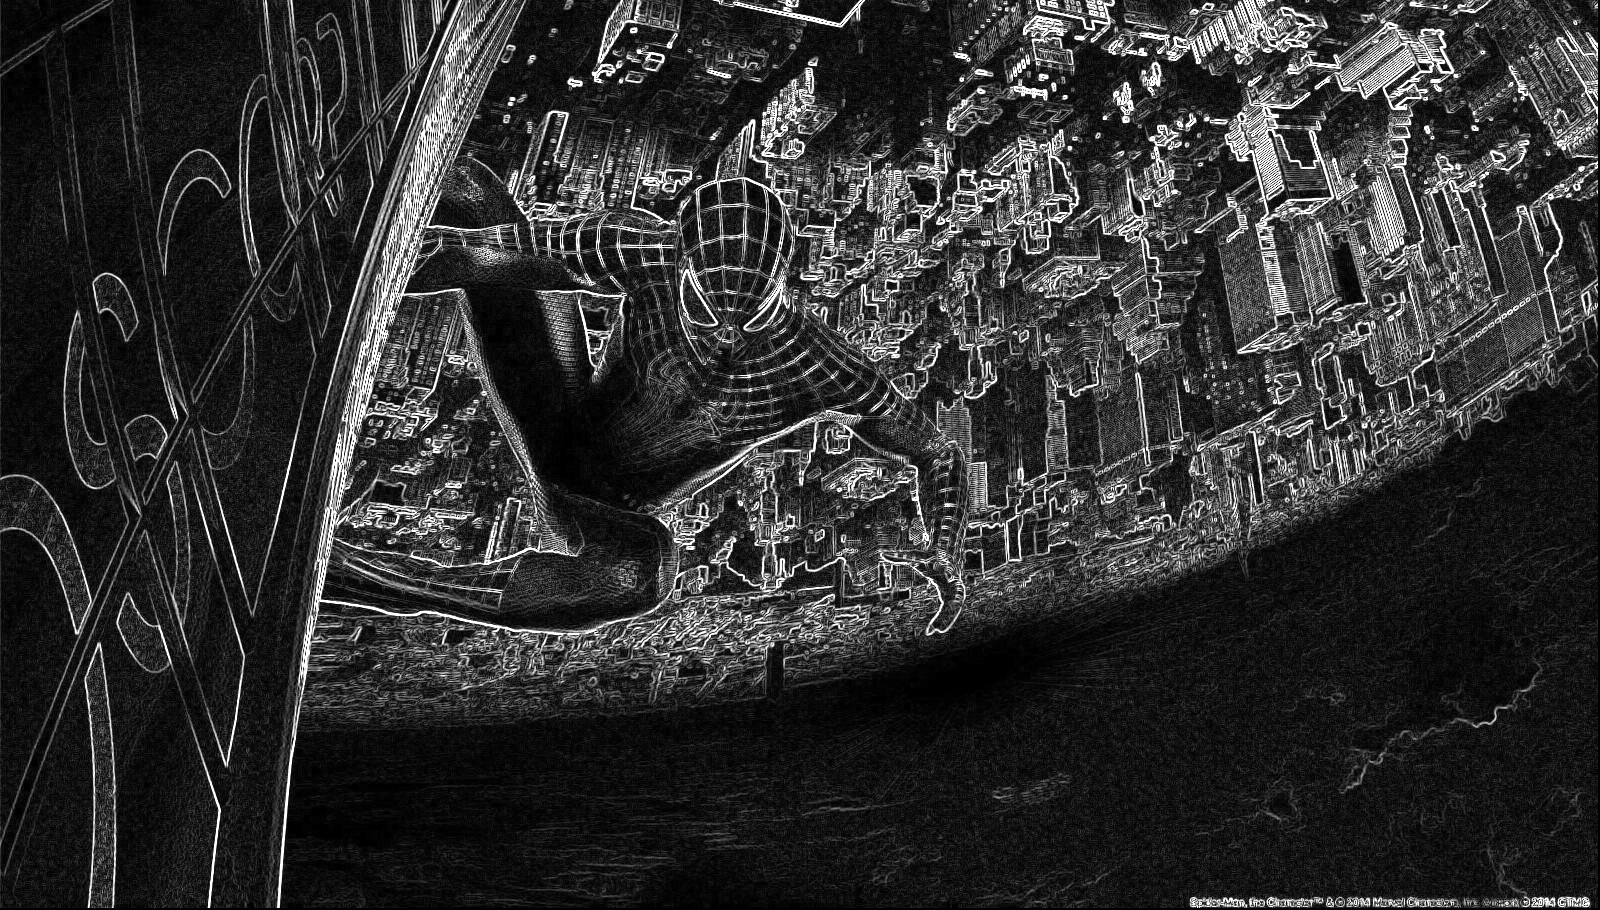

In [ ]:
cv2_imshow(newgradientImage)